In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#  Data Loading

In [ ]:
df = pd.read_csv('diabetic_data-1.csv')
print(df.shape)

(101766, 50)


# Data Exploration

# Count and distinct values of each features






In [ ]:
# Get distinct count for each feature
#distinct_counts = df.nunique()
for column in df.columns:
    distinct_values = df[column].unique()
    distinct_count = len(distinct_values)
    print(f"Feature: {column}")
    print(f"Distinct Count: {distinct_count}")
    print(f"Distinct Values: {distinct_values}")
    print()

Feature: encounter_id
Distinct Count: 101766
Distinct Values: [  2278392    149190     64410 ... 443854148 443857166 443867222]

Feature: patient_nbr
Distinct Count: 71518
Distinct Values: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]

Feature: race
Distinct Count: 6
Distinct Values: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Feature: gender
Distinct Count: 3
Distinct Values: ['Female' 'Male' 'Unknown/Invalid']

Feature: age
Distinct Count: 10
Distinct Values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Feature: weight
Distinct Count: 10
Distinct Values: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

Feature: admission_type_id
Distinct Count: 8
Distinct Values: [6 1 2 3 4 5 8 7]

Feature: discharge_disposition_id
Distinct Count: 26
Distinct Values: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]

Fe

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data Preprocessing

# Grouping into Class 0 and 1

In [ ]:
#count the number of readdmission by each type
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [ ]:

# Define the label function
def label(x):
    if x == 'NO' or x == '>30':
        return 0
    elif x == '<30':
        return 1
    else:
        return None  # Handle unexpected values

# Apply the label function to the 'readmitted' column
df['readmitted'] = df['readmitted'].apply(label)

# Display the modified DataFrame to verify changes
print(df.head())


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [ ]:
#count the number of readdmission by each type
df.groupby('readmitted').size()

readmitted
0    90409
1    11357
dtype: int64

# Finding Missing features percentage

In [ ]:
# Checking for missing values in the dataset where missing values are represented as '?'
# Initialize a dictionary to store the information
missing_info = {
    'Column': [],
    'Missing Count': [],
    'Missing Percentage': []
}

# Loop through the columns to calculate missing values
for col in df.columns:
    if df[col].dtype == object:
        missing_count = df[col][df[col] == '?'].count()
        if missing_count > 0:
            missing_percentage = (missing_count / len(df[col])) * 100
            missing_info['Column'].append(col)
            missing_info['Missing Count'].append(missing_count)
            missing_info['Missing Percentage'].append(f"{missing_percentage:.2f}%")

# Create a DataFrame from the dictionary
missing_df = pd.DataFrame(missing_info)

#Display columns with missing data and their respective count and missing percentages
print("Columns with missing data, their count, and respective missing percentages:")
print(missing_df)


Columns with missing data, their count, and respective missing percentages:
              Column  Missing Count Missing Percentage
0               race           2273              2.23%
1             weight          98569             96.86%
2         payer_code          40256             39.56%
3  medical_specialty          49949             49.08%
4             diag_1             21              0.02%
5             diag_2            358              0.35%
6             diag_3           1423              1.40%


# Missing value plot

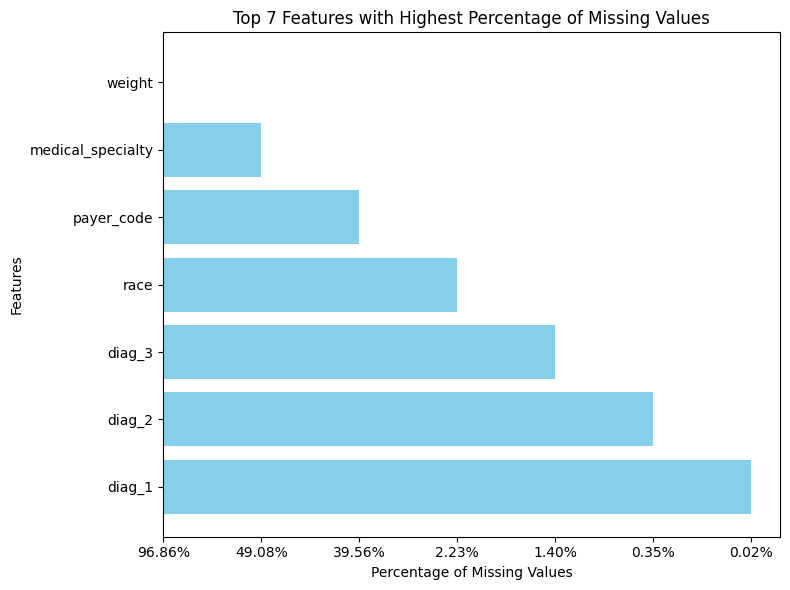

In [ ]:

# Select top 7 features with highest percentage of missing values
top_7_missing = missing_df.sort_values(by='Missing Percentage', ascending=False).head(7)

# Visualize the percentage of missing values for the top 7 features
plt.figure(figsize=(8, 6))
plt.barh(top_7_missing['Column'], top_7_missing['Missing Percentage'], color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Top 7 Features with Highest Percentage of Missing Values')
plt.gca().invert_yaxis()  # Invert y-axis to display highest percentage at the top
plt.tight_layout()
plt.show()


# Age Feature

In [ ]:
df.groupby('age').size()

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64

In [ ]:
age_id = {'[0-10)':5,
'[10-20)': 15,
'[20-30)':25,
'[30-40)':35,
'[40-50)':45,
'[50-60)':55,
'[60-70)':65,
'[70-80)':75,
'[80-90)':85,
'[90-100)':95}

df['age'] = df['age'].apply(lambda x: age_id[x])

# Dealing the columns with missing data

# Dropping weight, payer_code,medical_specialty

In [ ]:

df = df.drop(['weight', 'payer_code','medical_specialty'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  int64 
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

# # Feature diag_1 , diag_2 , diag_3 imputation by most common value

In [ ]:
from collections import Counter
diag_1 = Counter(list(df['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(df['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(df['diag_3'])).most_common(1)[0][0]
df['diag_1'] = df['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
df['diag_2'] = df['diag_2'].apply(lambda x : diag_2 if x == '?' else x)
df['diag_3'] = df['diag_3'].apply(lambda x : diag_3 if x == '?' else x)

# Imputation Race Feature

In [ ]:

# Count the frequency of each type in the 'race' column
race_freq = df['race'].value_counts()

# Print the frequency
print(race_freq)

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


In [ ]:

# Print the number of instances to be imputed for each race category
print('Caucasian will be imputed for:', int(2273 * 0.53))
print('AfricanAmerican will be imputed for:', int(2273 * 0.12))
print('Hispanic will be imputed for:', int(2273 * 0.01))

# Replace missing values in 'race' column with specified percentages
df.loc[df['race'] == '?', 'race'] = 'Caucasian'
df.loc[df['race'] == '?', 'race'] = 'AfricanAmerican'
df.loc[df['race'] == '?', 'race'] = 'Hispanic'

# Check unique values in the 'race' column to ensure all missing values are imputed
print(df['race'].unique())


Caucasian will be imputed for: 1204
AfricanAmerican will be imputed for: 272
Hispanic will be imputed for: 22
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


# Correlation between columns

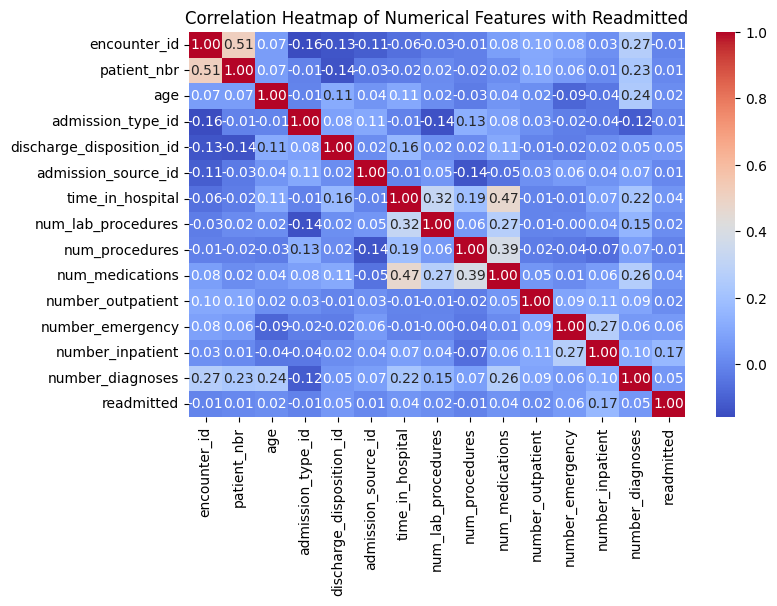

Analysis for race against readmitted:
readmitted           0     1
race                        
AfricanAmerican  17055  2155
Asian              576    65
Caucasian        69592  8780
Hispanic          1825   212
Other             1361   145


Analysis for gender against readmitted:
readmitted           0     1
gender                      
Female           48556  6152
Male             41850  5205
Unknown/Invalid      3     0


Analysis for diag_1 against readmitted:
readmitted   0   1
diag_1            
10           1   0
11          10   0
110          2   0
112         59  14
114          1   0
...         ..  ..
V63          7   1
V66          2   0
V67          1   0
V70          1   0
V71          9   0

[716 rows x 2 columns]


Analysis for diag_2 against readmitted:
readmitted    0   1
diag_2             
11            2   1
110           6   2
111           1   0
112         173  28
114           0   1
...         ...  ..
V69           1   0
V70           7   0
V72          13  

In [ ]:

#Identify Numerical and Non-Numerical Columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
non_numerical_columns = df.select_dtypes(include=['object', 'string', 'category']).columns

# Create DataFrames for Numerical and Non-Numerical Data
numerical_df = df[numerical_columns].copy()
non_numerical_df = df[non_numerical_columns].copy()

# Add the 'readmitted' column to both DataFrames
numerical_df['readmitted'] = df['readmitted']
non_numerical_df['readmitted'] = df['readmitted']

#Calculate Correlation Matrices for Numerical Columns
numerical_corr = numerical_df.corr()

# Analyze Non-Numerical Columns Against `readmitted`
# This can be done using cross-tabulation for categorical columns
non_numerical_analysis = {col: pd.crosstab(df[col], df['readmitted']) for col in non_numerical_columns}

# Plot Heatmaps for Numerical Data Correlation
plt.figure(figsize=(8, 5))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features with Readmitted')
plt.show()

# Display analysis for non-numerical columns
for col, analysis in non_numerical_analysis.items():
    print(f'Analysis for {col} against readmitted:')
    print(analysis)
    print('\n')



# Plot of categorical columns

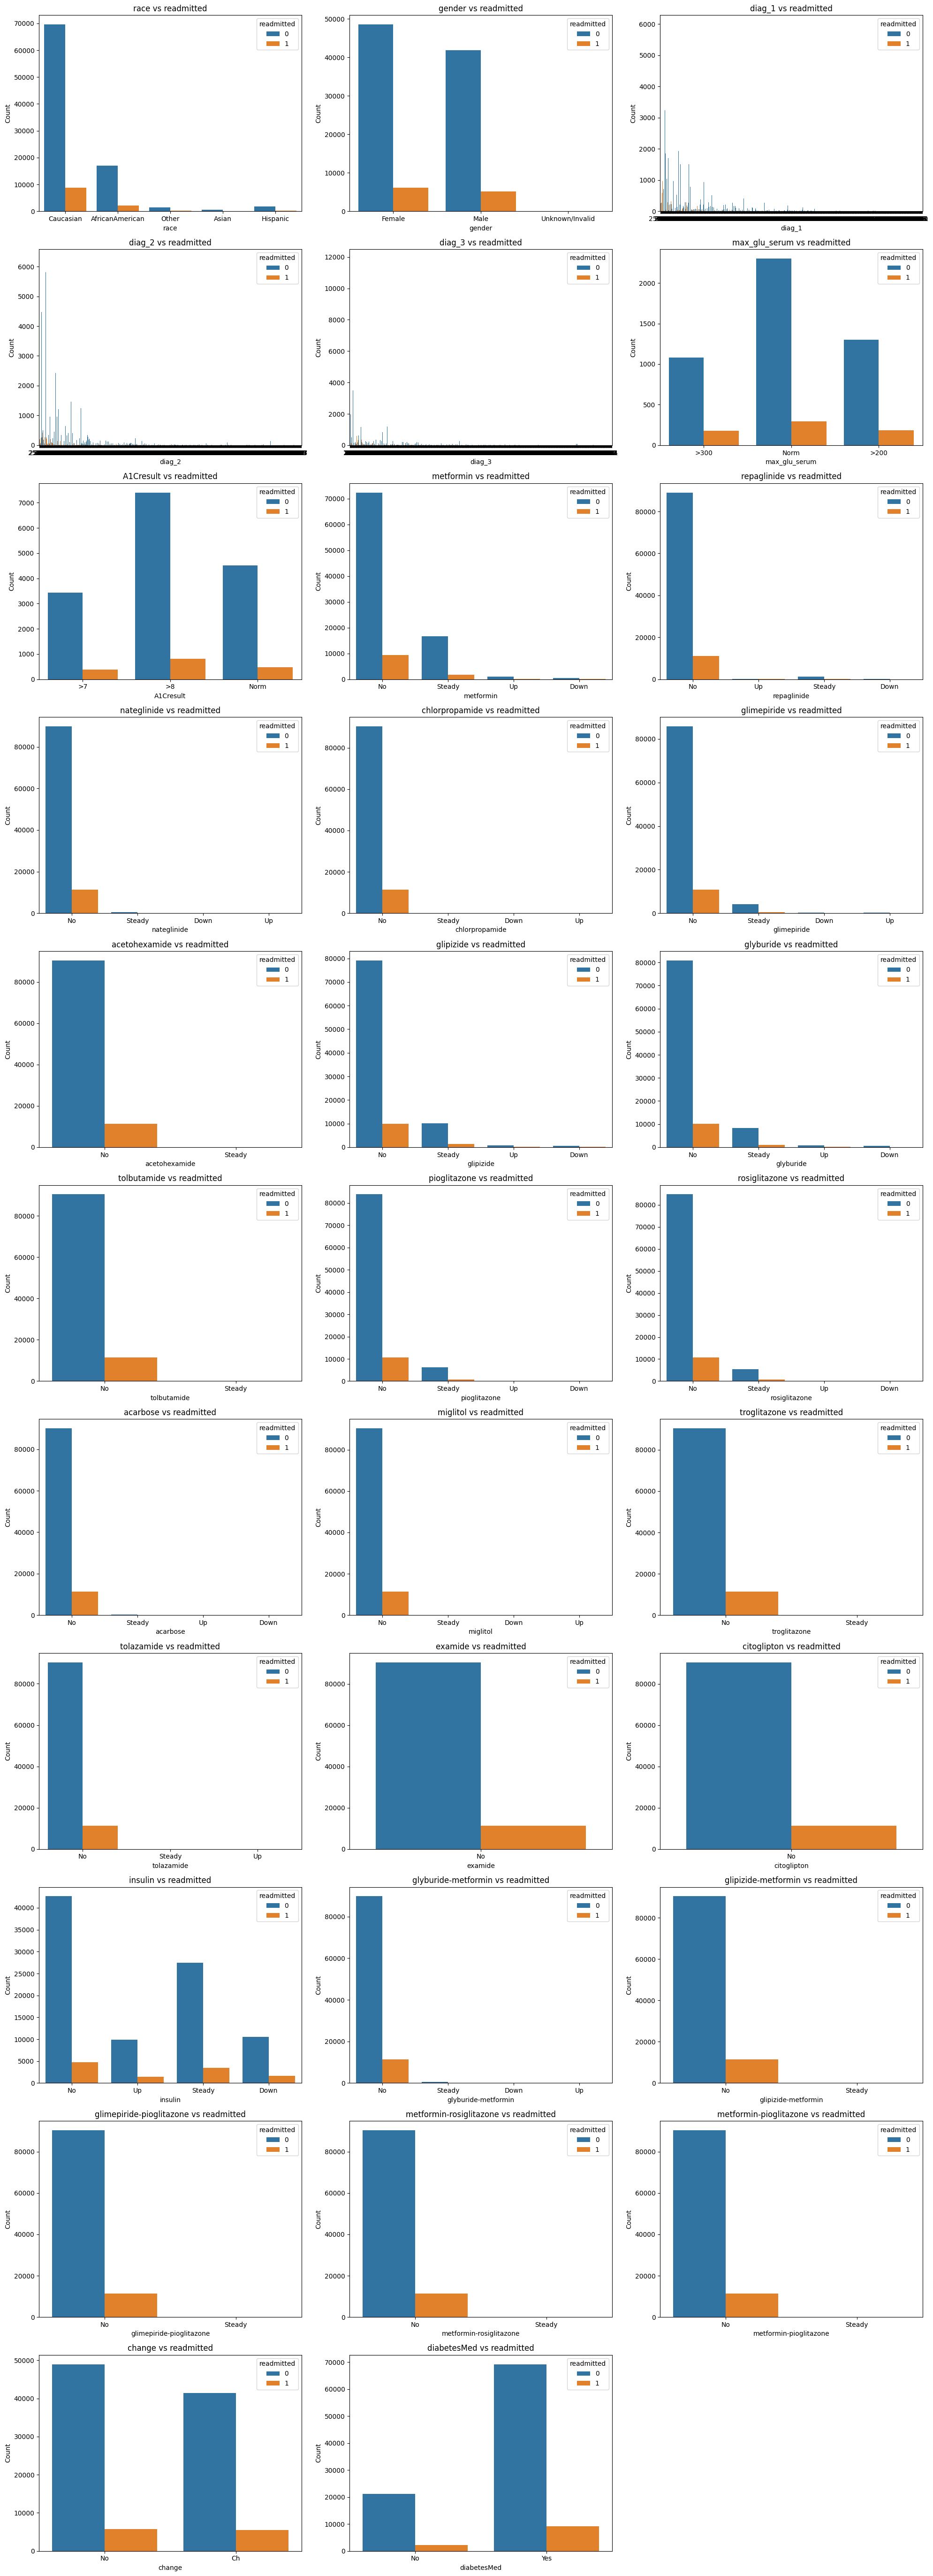

In [ ]:
#Identify Non-Numerical Columns
non_numerical_columns = df.select_dtypes(include=['object', 'string', 'category']).columns

# Add the 'readmitted' Column to Non-Numerical DataFrame
non_numerical_df = df[non_numerical_columns].copy()
non_numerical_df['readmitted'] = df['readmitted']

# Plot Non-Numerical Data in Subgraphs
num_cols = len(non_numerical_columns)
num_plots_per_row = 3
num_rows = (num_cols // num_plots_per_row) + (num_cols % num_plots_per_row > 0)

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))

# Flatten axes array if more than one row
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for ax, col in zip(axes, non_numerical_columns):
    sns.countplot(data=non_numerical_df, x=col, hue='readmitted', ax=ax)
    ax.set_title(f'{col} vs readmitted')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='readmitted')

# Remove any empty subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Plot of numerical_columns

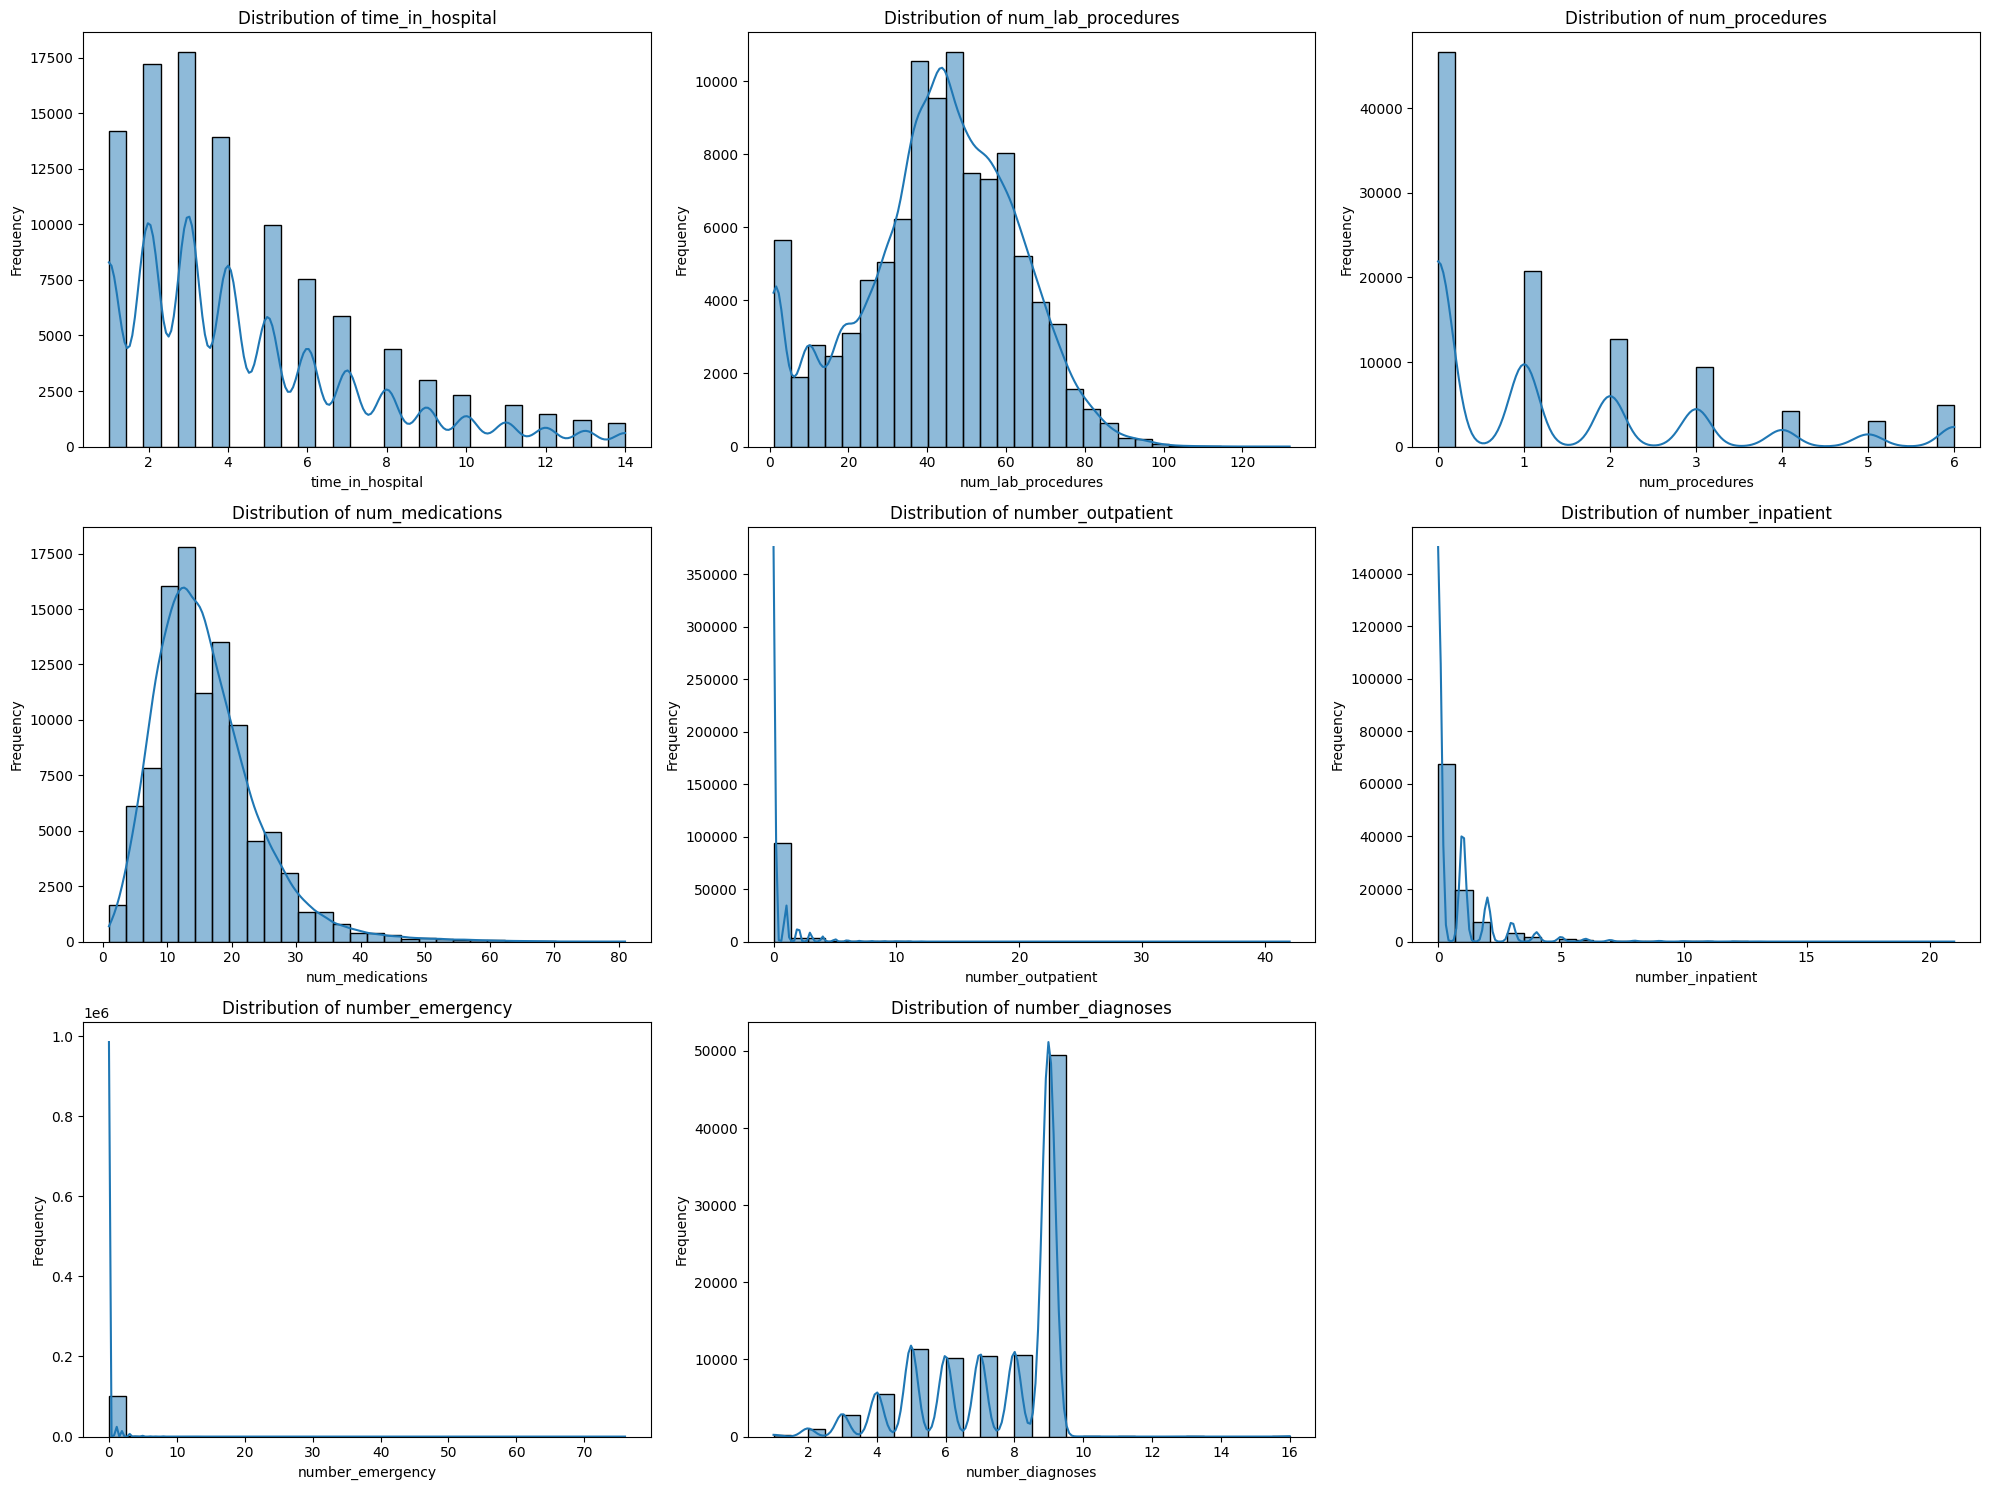

In [ ]:
# List of features to analyze
features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_inpatient', 'number_emergency', 'number_diagnoses']

# Plot Histograms in Subplots
num_features = len(features)
num_plots_per_row = 3
num_rows = (num_features // num_plots_per_row) + (num_features % num_plots_per_row > 0)

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))

# Flatten axes array if more than one row
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for ax, feature in zip(axes, features):
    sns.histplot(df[feature], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Outlier detection

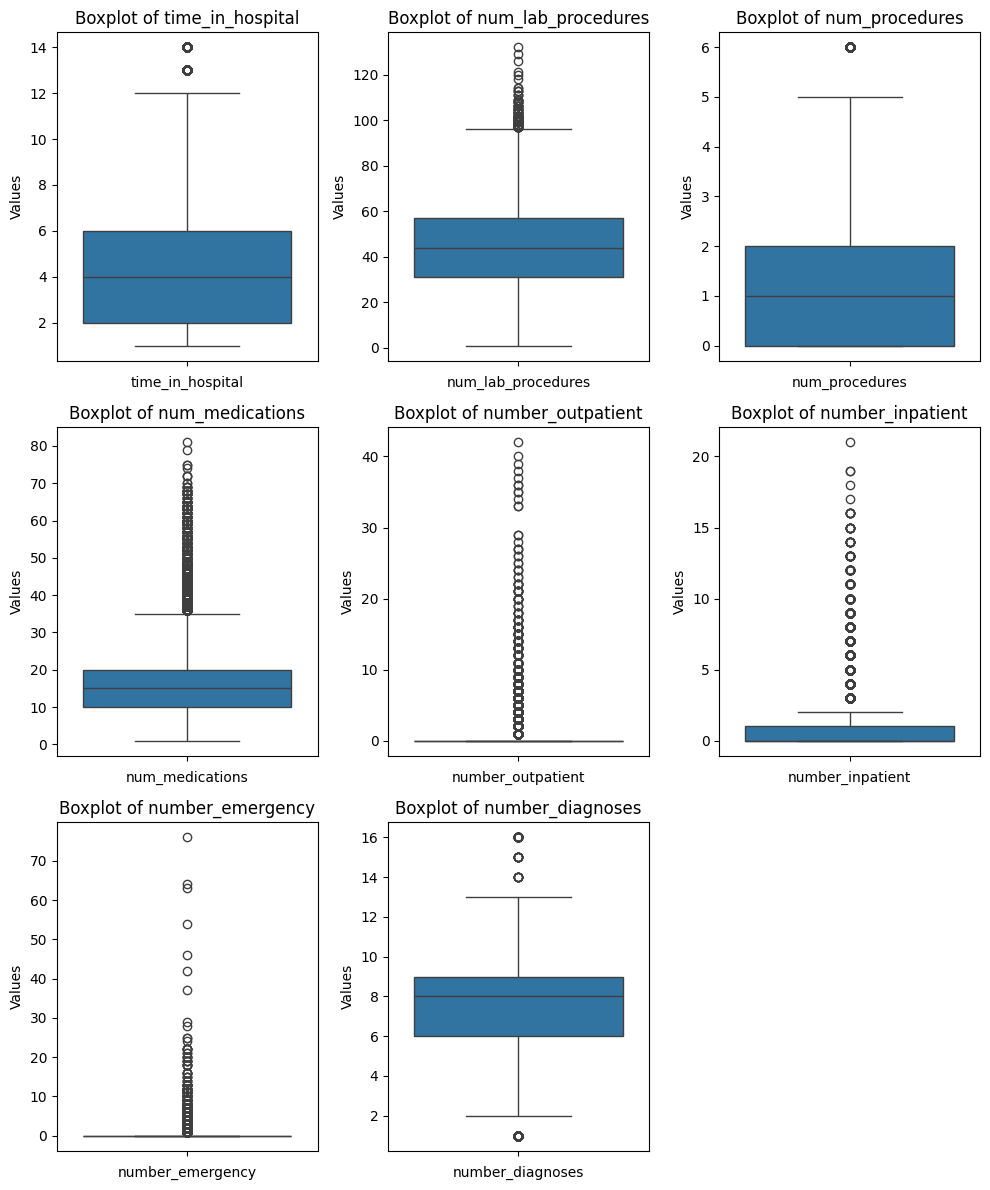

In [ ]:

# List of features to analyze
features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_inpatient', 'number_emergency', 'number_diagnoses']

#Plot Boxplots in Subplots
num_features = len(features)
num_plots_per_row = 3
num_rows = (num_features // num_plots_per_row) + (num_features % num_plots_per_row > 0)

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(10, 4 * num_rows))

# Flatten axes array if more than one row
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for ax, feature in zip(axes, features):
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Values')

# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Scatter plots for continuous variables

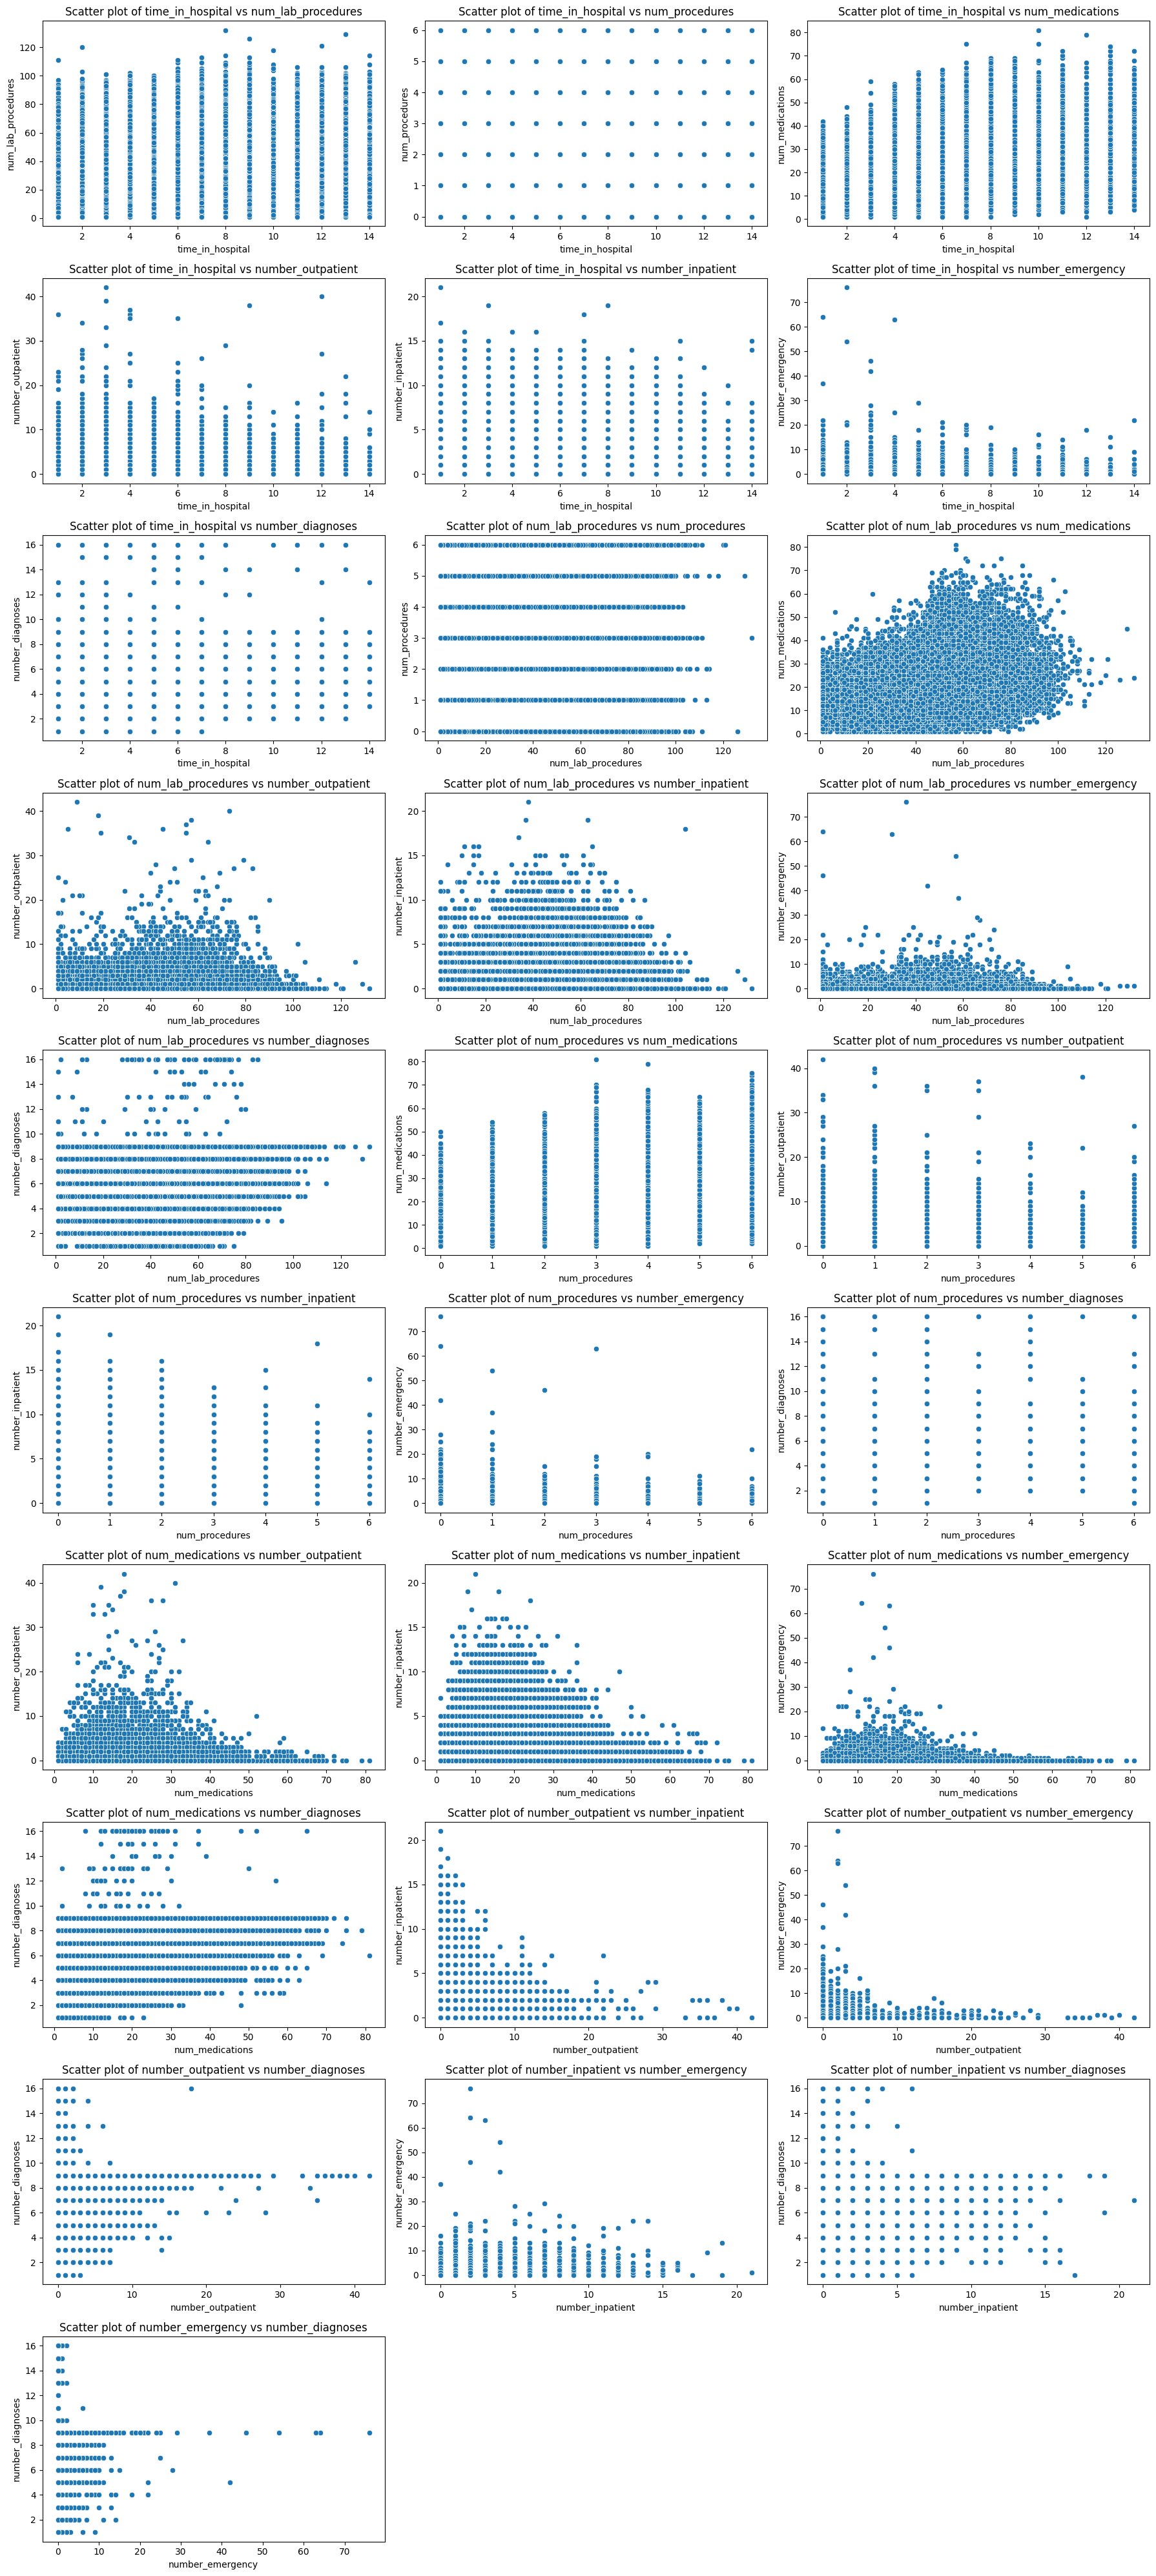

In [ ]:
continuous_vars = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                   'number_outpatient', 'number_inpatient', 'number_emergency', 'number_diagnoses']

# Calculate the number of continuous variable pairs
num_pairs = len(continuous_vars) * (len(continuous_vars) - 1) // 2

# Calculate the number of rows needed (3 plots per row)
rows = (num_pairs + 2) // 3

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

pair_idx = 0
for i in range(len(continuous_vars)):
    for j in range(i + 1, len(continuous_vars)):
        if pair_idx < len(axes):
            ax = axes[pair_idx]
            sns.scatterplot(x=df[continuous_vars[i]], y=df[continuous_vars[j]], ax=ax)
            ax.set_title(f'Scatter plot of {continuous_vars[i]} vs {continuous_vars[j]}')
            ax.set_xlabel(continuous_vars[i])
            ax.set_ylabel(continuous_vars[j])
            pair_idx += 1

# Remove any unused subplots
for k in range(pair_idx, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


# Multivariable relationships

# Readmission Rates by Age, Gender

<Figure size 1000x500 with 0 Axes>

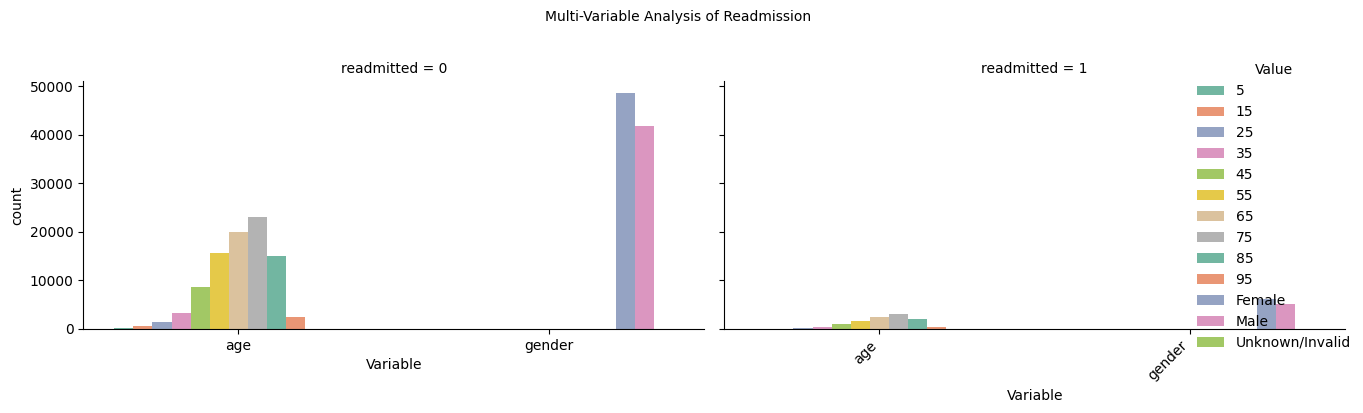

In [ ]:
# Select relevant columns
columns_of_interest = ['age','gender','readmitted']
subset_df = df[columns_of_interest]

# Melt dataframe to long format for visualization
subset_df_melted = subset_df.melt(id_vars='readmitted', var_name='Variable', value_name='Value')

# Create catplot
plt.figure(figsize=(10, 5))
sns.catplot(data=subset_df_melted, x='Variable', hue='Value', col='readmitted', kind='count',
            height=4, aspect=1.5, palette='Set2', col_order=[0, 1])

# Set titles and labels
plt.suptitle('Multi-Variable Analysis of Readmission', fontsize=10, y=1.02)
plt.xlabel('Variable')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Readmission Rates by Gender, and Race

<Figure size 1000x500 with 0 Axes>

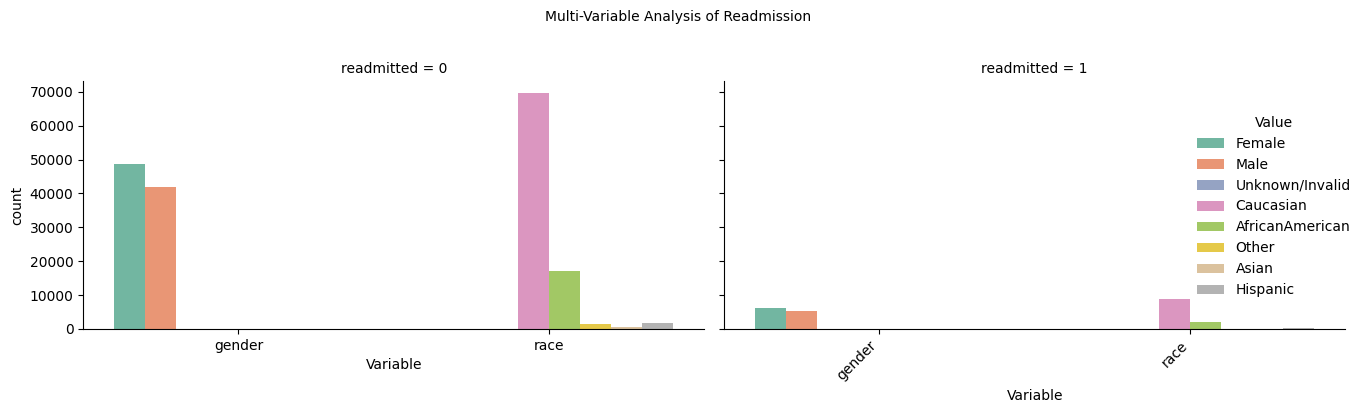

In [ ]:
# Select relevant columns
columns_of_interest = ['gender','race','readmitted']
subset_df = df[columns_of_interest]

# Melt dataframe to long format for visualization
subset_df_melted = subset_df.melt(id_vars='readmitted', var_name='Variable', value_name='Value')

# Create catplot
plt.figure(figsize=(10, 5))
sns.catplot(data=subset_df_melted, x='Variable', hue='Value', col='readmitted', kind='count',
            height=4, aspect=1.5, palette='Set2', col_order=[0, 1])

# Set titles and labels
plt.suptitle('Multi-Variable Analysis of Readmission', fontsize=10, y=1.02)
plt.xlabel('Variable')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Readmission Rates by max_glu_serum, A1Cresult

<Figure size 1600x1200 with 0 Axes>

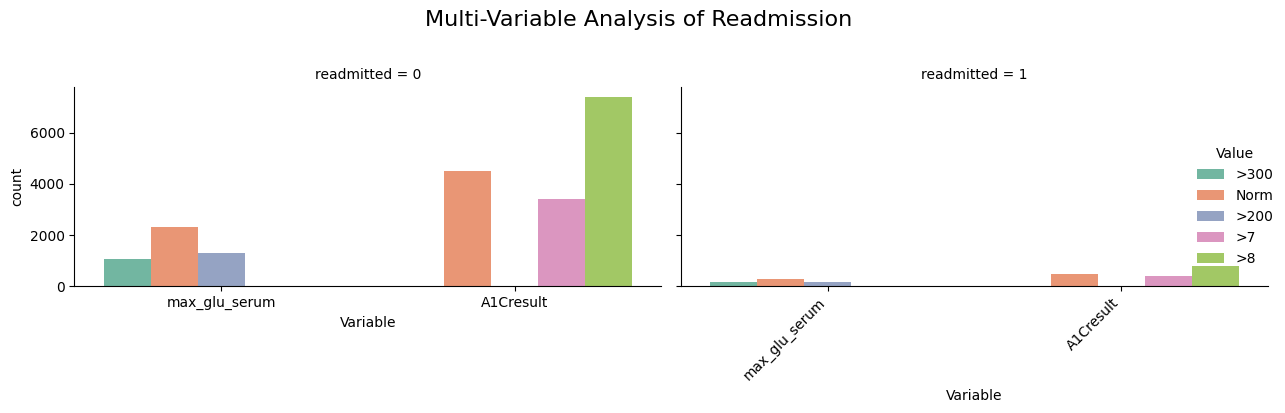

In [ ]:


# Select relevant columns
columns_of_interest = ['max_glu_serum', 'A1Cresult', 'readmitted']
subset_df = df[columns_of_interest]

# Melt dataframe to long format for visualization
subset_df_melted = subset_df.melt(id_vars='readmitted', var_name='Variable', value_name='Value')

# Create catplot
plt.figure(figsize=(16, 12))
sns.catplot(data=subset_df_melted, x='Variable', hue='Value', col='readmitted', kind='count',
            height=4, aspect=1.5, palette='Set2', col_order=[0, 1])

# Set titles and labels
plt.suptitle('Multi-Variable Analysis of Readmission', fontsize=16, y=1.02)
plt.xlabel('Variable')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# # Feature Engineering





In [ ]:
print(df.head())

   encounter_id  patient_nbr             race  gender  age  admission_type_id  \
0       2278392      8222157        Caucasian  Female    5                  6   
1        149190     55629189        Caucasian  Female   15                  1   
2         64410     86047875  AfricanAmerican  Female   25                  1   
3        500364     82442376        Caucasian    Male   35                  1   
4         16680     42519267        Caucasian    Male   45                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

   num_lab_procedures  ...  citoglipton  insulin  glyburide-metformin  \
0                  

# Transformation of positively skewed plot

In [ ]:
from scipy.stats import skew

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check skewness of each numeric variable
skewness = numeric_df.apply(skew)
print("Skewness before transformation:\n", skewness)

# Identify variables with skewness > 1
high_skew_columns = skewness[skewness > 1].index.tolist()
print("Variables with skewness > 1:", high_skew_columns)

Skewness before transformation:
 encounter_id                 0.699131
patient_nbr                  0.471274
age                         -0.630530
admission_type_id            1.591961
discharge_disposition_id     2.563029
admission_source_id          1.029920
time_in_hospital             1.133982
num_lab_procedures          -0.236540
num_procedures               1.316395
num_medications              1.326653
number_outpatient            8.832829
number_emergency            22.855245
number_inpatient             3.614086
number_diagnoses            -0.876733
readmitted                   2.467034
dtype: float64
Variables with skewness > 1: ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'readmitted']


In [ ]:
# Apply square-root transformation for count data and log transformation for size data
for col in high_skew_columns:
    if col in ['time_in_hospital', 'num_procedures', 'number_outpatient', 'number_inpatient', 'number_emergency']:
        df[f'{col}_sqrt'] = np.sqrt(df[col])
    elif col in ['num_medications']:
        df[f'{col}_log'] = np.log1p(df[col])  # np.log1p is equivalent to log(1 + x)

# Check skewness after transformation
transformed_skewness = df[[f'{col}_sqrt' for col in high_skew_columns if f'{col}_sqrt' in df.columns] +
                          [f'{col}_log' for col in high_skew_columns if f'{col}_log' in df.columns]].apply(skew)
print("Skewness after transformation:\n", transformed_skewness)

# Display the transformed dataframe
print(df)


Skewness after transformation:
 time_in_hospital_sqrt     0.473596
num_procedures_sqrt       0.405462
number_outpatient_sqrt    2.739159
number_emergency_sqrt     3.679552
number_inpatient_sqrt     1.300642
num_medications_log      -0.485321
dtype: float64
        encounter_id  patient_nbr             race  gender  age  \
0            2278392      8222157        Caucasian  Female    5   
1             149190     55629189        Caucasian  Female   15   
2              64410     86047875  AfricanAmerican  Female   25   
3             500364     82442376        Caucasian    Male   35   
4              16680     42519267        Caucasian    Male   45   
...              ...          ...              ...     ...  ...   
101761     443847548    100162476  AfricanAmerican    Male   75   
101762     443847782     74694222  AfricanAmerican  Female   85   
101763     443854148     41088789        Caucasian    Male   75   
101764     443857166     31693671        Caucasian  Female   85   
101765

# **Normalization**

       encounter_id   patient_nbr            age  admission_type_id  \
count  1.017660e+05  1.017660e+05  101766.000000      101766.000000   
mean   1.652016e+08  5.433040e+07      65.967022           2.024006   
std    1.026403e+08  3.869636e+07      15.940838           1.445403   
min    1.252200e+04  1.350000e+02       5.000000           1.000000   
25%    8.496119e+07  2.341322e+07      55.000000           1.000000   
50%    1.523890e+08  4.550514e+07      65.000000           1.000000   
75%    2.302709e+08  8.754595e+07      75.000000           3.000000   
max    4.438672e+08  1.895026e+08      95.000000           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.

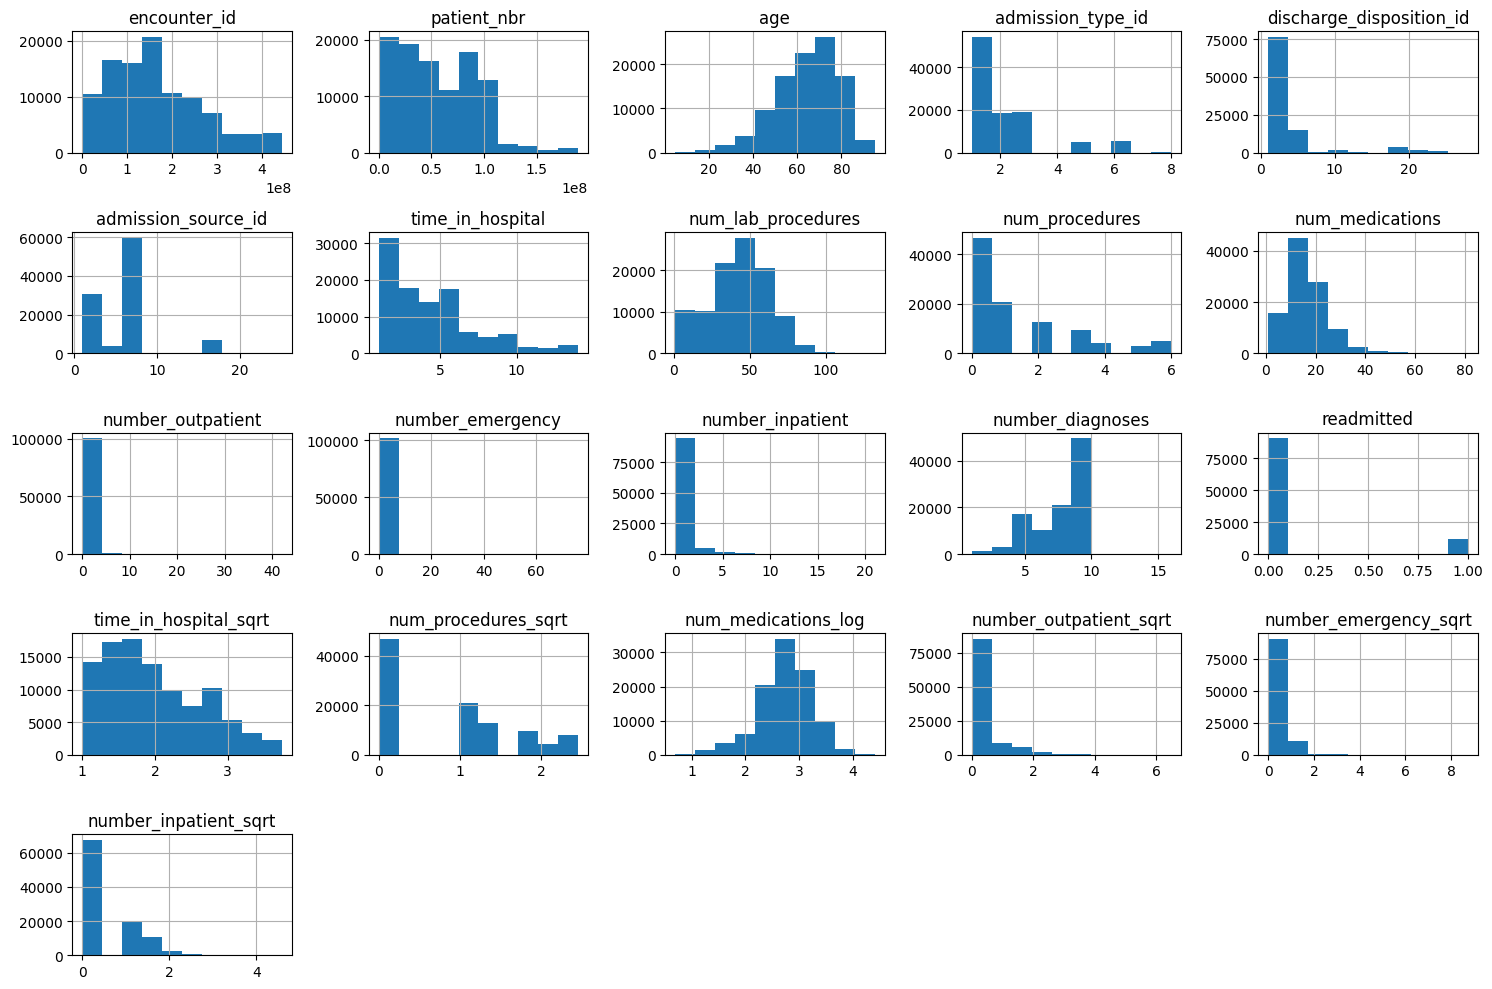

        encounter_id  patient_nbr             race  gender       age  \
0           0.005105     0.043387        Caucasian  Female  0.000000   
1           0.000308     0.293553        Caucasian  Female  0.111111   
2           0.000117     0.454072  AfricanAmerican  Female  0.222222   
3           0.001099     0.435046        Caucasian    Male  0.333333   
4           0.000009     0.224372        Caucasian    Male  0.444444   
...              ...          ...              ...     ...       ...   
101761      0.999956     0.528554  AfricanAmerican    Male  0.777778   
101762      0.999956     0.394159  AfricanAmerican  Female  0.888889   
101763      0.999971     0.216824        Caucasian    Male  0.777778   
101764      0.999977     0.167246        Caucasian  Female  0.888889   
101765      1.000000     0.925735        Caucasian    Male  0.777778   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                0.714286                  0.888889        

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 #Check summary statistics
print(df.describe())

# Visualize distributions
df.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Assuming we determine normalization is required based on the inspection
scaler = MinMaxScaler()


# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the normalized dataframe
print(df)

# Dropping few columns not necessary for analysis

In [ ]:
# Assuming df is your DataFrame
columns_to_drop = ['encounter_id', 'patient_nbr']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

# Verify the changes
print(df.head())


              race  gender       age  admission_type_id  \
0        Caucasian  Female  0.000000           0.714286   
1        Caucasian  Female  0.111111           0.000000   
2  AfricanAmerican  Female  0.222222           0.000000   
3        Caucasian    Male  0.333333           0.000000   
4        Caucasian    Male  0.444444           0.000000   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                  0.888889                 0.00          0.000000   
1                  0.000000                 0.25          0.153846   
2                  0.000000                 0.25          0.076923   
3                  0.000000                 0.25          0.076923   
4                  0.000000                 0.25          0.000000   

   num_lab_procedures  num_procedures  num_medications  ...  \
0            0.305344        0.000000           0.0000  ...   
1            0.442748        0.000000           0.2125  ...   
2            0.076336        0.8333

# Creating New Features

In [ ]:

# Calculate Health_index
df['Health_index'] = 1 / (df['number_emergency'] + df['number_inpatient'] + df['number_outpatient'])

# If there are cases where the denominator is zero (resulting in division by zero), replace with NaN
df['Health_index'].replace({0: pd.NA}, inplace=True)

# Calculate severity_of_disease
df['severity_of_disease'] = df['time_in_hospital'] + df['num_procedures'] + df['num_medications'] + df['num_lab_procedures'] + df['number_diagnoses']


# Print the DataFrame to verify the changes
print(df.head())


              race  gender       age  admission_type_id  \
0        Caucasian  Female  0.000000           0.714286   
1        Caucasian  Female  0.111111           0.000000   
2  AfricanAmerican  Female  0.222222           0.000000   
3        Caucasian    Male  0.333333           0.000000   
4        Caucasian    Male  0.444444           0.000000   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                  0.888889                 0.00          0.000000   
1                  0.000000                 0.25          0.153846   
2                  0.000000                 0.25          0.076923   
3                  0.000000                 0.25          0.076923   
4                  0.000000                 0.25          0.000000   

   num_lab_procedures  num_procedures  num_medications  ...  diabetesMed  \
0            0.305344        0.000000           0.0000  ...           No   
1            0.442748        0.000000           0.2125  ...          Yes

In [ ]:
from tqdm import tqdm

drugList =['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

number_of_changes = []
for i in tqdm(range(len(df))):
    changeCount = 0
    for col in drugList:
        if df.iloc[i][col] in ['Down', 'Up']:
            changeCount += 1
    number_of_changes.append(changeCount)

# Add the 'number_of_changes' column to the DataFrame
df['number_of_changes'] = number_of_changes

# Print the DataFrame to verify the changes
print(df.head())


100%|██████████| 101766/101766 [04:06<00:00, 413.56it/s]

              race  gender       age  admission_type_id  \
0        Caucasian  Female  0.000000           0.714286   
1        Caucasian  Female  0.111111           0.000000   
2  AfricanAmerican  Female  0.222222           0.000000   
3        Caucasian    Male  0.333333           0.000000   
4        Caucasian    Male  0.444444           0.000000   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                  0.888889                 0.00          0.000000   
1                  0.000000                 0.25          0.153846   
2                  0.000000                 0.25          0.076923   
3                  0.000000                 0.25          0.076923   
4                  0.000000                 0.25          0.000000   

   num_lab_procedures  num_procedures  num_medications  ...  readmitted  \
0            0.305344        0.000000           0.0000  ...         0.0   
1            0.442748        0.000000           0.2125  ...         0.0   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101766 non-null  object 
 1   gender                    101766 non-null  object 
 2   age                       101766 non-null  float64
 3   admission_type_id         101766 non-null  float64
 4   discharge_disposition_id  101766 non-null  float64
 5   admission_source_id       101766 non-null  float64
 6   time_in_hospital          101766 non-null  float64
 7   num_lab_procedures        101766 non-null  float64
 8   num_procedures            101766 non-null  float64
 9   num_medications           101766 non-null  float64
 10  number_outpatient         101766 non-null  float64
 11  number_emergency          101766 non-null  float64
 12  number_inpatient          101766 non-null  float64
 13  diag_1                    101766 non-null  o

# Dropping all the medication columns after creating new features

In [ ]:
# Range of column indices to drop
col_indices_to_drop = range(19, 42)

# Drop the columns by index range
df = df.drop(df.columns[col_indices_to_drop], axis=1)
print(df.info())
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101766 non-null  object 
 1   gender                    101766 non-null  object 
 2   age                       101766 non-null  float64
 3   admission_type_id         101766 non-null  float64
 4   discharge_disposition_id  101766 non-null  float64
 5   admission_source_id       101766 non-null  float64
 6   time_in_hospital          101766 non-null  float64
 7   num_lab_procedures        101766 non-null  float64
 8   num_procedures            101766 non-null  float64
 9   num_medications           101766 non-null  float64
 10  number_outpatient         101766 non-null  float64
 11  number_emergency          101766 non-null  float64
 12  number_inpatient          101766 non-null  float64
 13  diag_1                    101766 non-null  o

In [ ]:
# Replace infinite values with NaN
df['Health_index'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Option 1: Fill NaN values with a specific value (e.g., the mean of the column)
df['Health_index'].fillna(df['Health_index'].mean(), inplace=True)
# Convert 'Health_index' column to integer
df['Health_index'] = df['Health_index'].astype(int)
print(df.head())


              race  gender       age  admission_type_id  \
0        Caucasian  Female  0.000000           0.714286   
1        Caucasian  Female  0.111111           0.000000   
2  AfricanAmerican  Female  0.222222           0.000000   
3        Caucasian    Male  0.333333           0.000000   
4        Caucasian    Male  0.444444           0.000000   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                  0.888889                 0.00          0.000000   
1                  0.000000                 0.25          0.153846   
2                  0.000000                 0.25          0.076923   
3                  0.000000                 0.25          0.076923   
4                  0.000000                 0.25          0.000000   

   num_lab_procedures  num_procedures  num_medications  ...  readmitted  \
0            0.305344        0.000000           0.0000  ...         0.0   
1            0.442748        0.000000           0.2125  ...         0.0   

In [ ]:

def find_and_remove_redundant_columns(df):
    redundant_columns = set()
    suffixes = ['_log', '_sqrt']

    # Identify original columns that have corresponding transformed columns
    for suffix in suffixes:
        for col in df.columns:
            if col.endswith(suffix):
                base_col = col.replace(suffix, '')
                if base_col in df.columns:
                    redundant_columns.add(base_col)

    # Create a new DataFrame excluding the redundant columns
    df_cleaned = df.drop(columns=redundant_columns)

    return df_cleaned, list(redundant_columns)

# Example usage
df_cleaned, redundant_columns = find_and_remove_redundant_columns(df)
df = df_cleaned.copy()
print("Redundant columns:", redundant_columns)




Redundant columns: ['num_medications', 'number_outpatient', 'time_in_hospital', 'number_inpatient', 'num_procedures', 'number_emergency']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101766 non-null  object 
 1   gender                    101766 non-null  object 
 2   age                       101766 non-null  float64
 3   admission_type_id         101766 non-null  float64
 4   discharge_disposition_id  101766 non-null  float64
 5   admission_source_id       101766 non-null  float64
 6   num_lab_procedures        101766 non-null  float64
 7   diag_1                    101766 non-null  object 
 8   diag_2                    101766 non-null  object 
 9   diag_3                    101766 non-null  object 
 10  number_diagnoses          101766 non-null  float64
 11  max_glu_serum             5346 non-null    object 
 12  A1Cresult                 17018 non-null   object 
 13  change                    101766 non-null  o

# Separating features and label

In [ ]:
# Get the list of all columns in the DataFrame
feature_set = list(df.columns)
print("Feature set:", feature_set)

# Define the target variable y
y = df['readmitted']

# Define the feature set X by dropping the 'readmitted' column
X = df.drop(columns='readmitted')

# Print the shapes of y and X to confirm
print("y shape:", y.shape)
print("X shape:", X.shape)


Feature set: ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'num_lab_procedures', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted', 'time_in_hospital_sqrt', 'num_procedures_sqrt', 'num_medications_log', 'number_outpatient_sqrt', 'number_emergency_sqrt', 'number_inpatient_sqrt', 'Health_index', 'severity_of_disease', 'number_of_changes']
y shape: (101766,)
X shape: (101766, 24)


In [ ]:
# Step 1: Identify Non-Numerical Columns
non_numerical_columns = df.select_dtypes(include=['object', 'string', 'category']).columns

# Step 2: Perform One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=non_numerical_columns, drop_first=True)

# Display the DataFrame with one-hot encoded features
print(df_encoded.head())

        age  admission_type_id  discharge_disposition_id  admission_source_id  \
0  0.000000           0.714286                  0.888889                 0.00   
1  0.111111           0.000000                  0.000000                 0.25   
2  0.222222           0.000000                  0.000000                 0.25   
3  0.333333           0.000000                  0.000000                 0.25   
4  0.444444           0.000000                  0.000000                 0.25   

   num_lab_procedures  number_diagnoses  readmitted  time_in_hospital_sqrt  \
0            0.305344          0.000000         0.0               1.000000   
1            0.442748          0.533333         0.0               1.732051   
2            0.076336          0.333333         0.0               1.414214   
3            0.328244          0.400000         0.0               1.414214   
4            0.381679          0.266667         0.0               1.000000   

   num_procedures_sqrt  num_medications_log 

# **Logistic Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Step 1: Separate features and target variable
X = df_encoded.drop('readmitted', axis=1)  # Features
y = df_encoded['readmitted']  # Target

# Step 2: Perform SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Step 4: Train a logistic regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [ ]:
# Step 5: Make predictions
y_pred = log_reg.predict(X_test)
y_pred_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Step 6: Evaluate the model
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[26916   120]
 [ 4070 23140]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     27036
         1.0       0.99      0.85      0.92     27210

    accuracy                           0.92     54246
   macro avg       0.93      0.92      0.92     54246
weighted avg       0.93      0.92      0.92     54246



In [ ]:
# Accuracy Score
accuracy_lr = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy_lr)

# Precision, Recall, F1 Score
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\nPrecision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1)



Accuracy Score: 0.9227592817903624

Precision: 0.9948409286328461
Recall: 0.850422638735759
F1 Score: 0.9169803843867644


# #Finding Top 10 features using Chi-Square Test

                    Feature    Importance
868              diag_2_276    667.306057
1750             diag_3_428    710.520090
1730             diag_3_403    797.042901
976              diag_2_403    817.670095
1877             diag_3_585    909.910168
996              diag_2_428    992.151468
10    number_emergency_sqrt   1227.128904
296              diag_1_428   1630.244679
11    number_inpatient_sqrt   5997.817235
12             Health_index  11009.335733


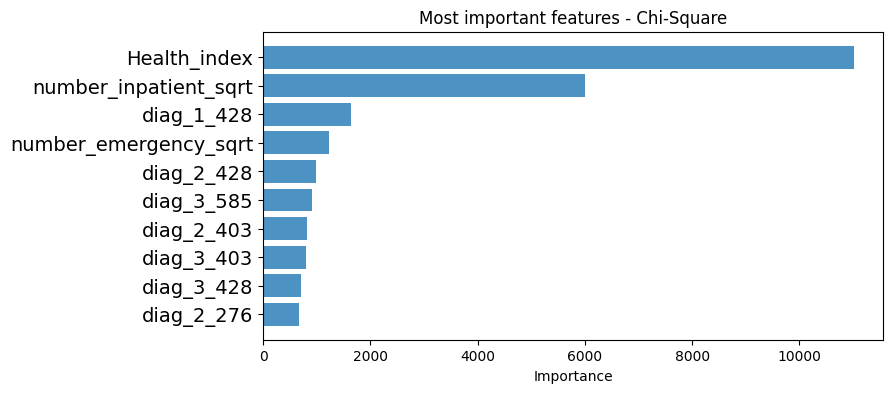

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2

# Assuming you have your X_train and y_train defined

# Apply SelectKBest with chi2 to get the top features
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selector.fit(X_train, y_train)

# Get the feature names and their scores
feature_names = X_train.columns
feature_scores = selector.scores_

# Create DataFrame with feature names and their importance
most_imp_features = pd.DataFrame([f for f in zip(feature_names, feature_scores)], columns=["Feature", "Importance"])

# Get top k most important features
most_imp_features = most_imp_features.nlargest(k, "Importance")

# Sort values by Importance
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
# Plotting
plt.figure(figsize=(8, 4))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Chi-Square')
plt.show()


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [ ]:
dtree_pred = dtree.predict(X_test)
y_pred_prob_dtree = dtree.predict_proba(X_test)[:, 1]
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0.0,1.0,All
Actual,,,
0.0,7658,6616,14274
1.0,993,882,1875
All,8651,7498,16149


In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.90
Precision is 0.94
Recall is 0.87


                     Feature  Importance
8        num_medications_log    0.012717
4         num_lab_procedures    0.015848
13       severity_of_disease    0.016494
6      time_in_hospital_sqrt    0.017113
1          admission_type_id    0.021262
11     number_inpatient_sqrt    0.039384
0                        age    0.083570
3        admission_source_id    0.087793
5           number_diagnoses    0.123105
2   discharge_disposition_id    0.405217


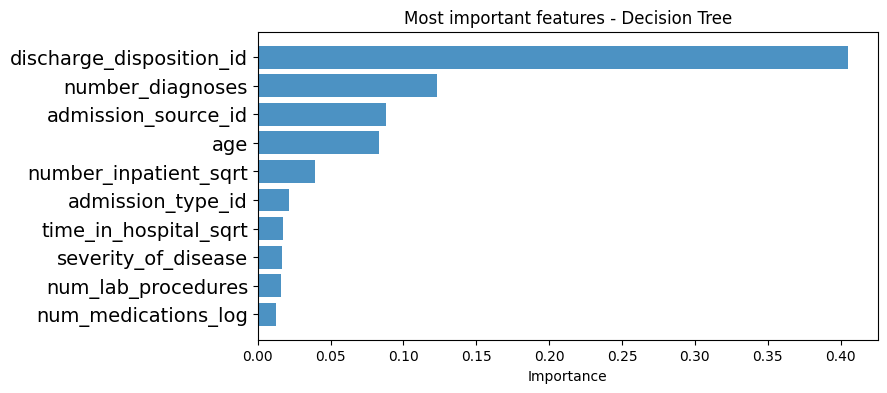

In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(8,4))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [ ]:
rf_prd = rf.predict(X_test)
y_pred_prob_rf = log_reg.predict_proba(X_test)[:, 1]
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rf_prd, name = 'Predict'), margins = True)

Predict,0.0,1.0,All
Actual,,,
0.0,7413,6861,14274
1.0,959,916,1875
All,8372,7777,16149


In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rf_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rf_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rf_prd)))

accuracy_rf = accuracy_score(y_test, rf_prd)
precision_rf = precision_score(y_test, rf_prd)
recall_rf = recall_score(y_test, rf_prd)

Accuracy is 0.82
Precision is 0.83
Recall is 0.81


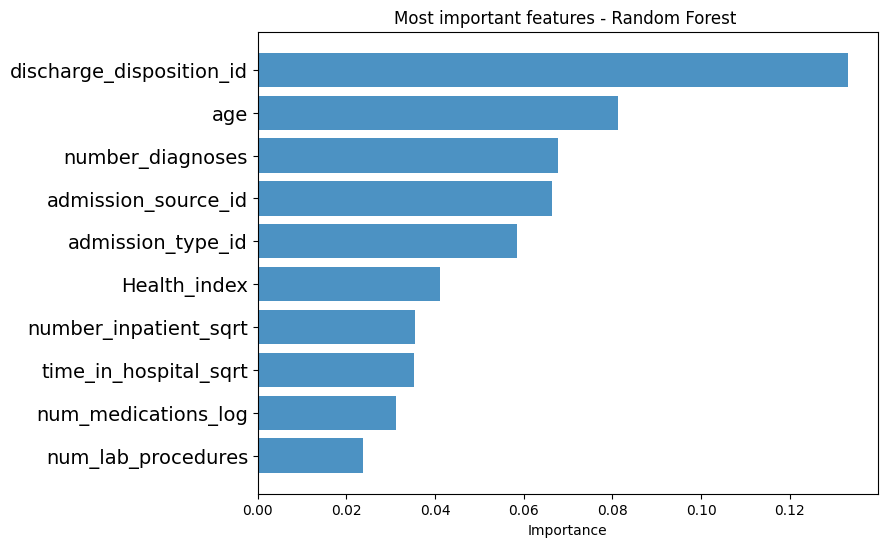

In [ ]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(8,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

# Model Comparision

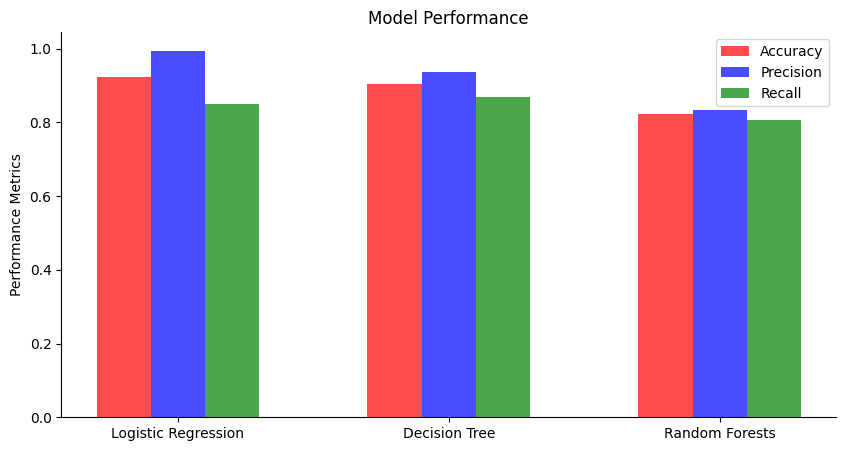

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']

# Accuracy
accuracy = [accuracy_lr, accuracy_dtree, accuracy_rf]
plt.bar(np.arange(len(models)), accuracy, align='center', width=0.2, alpha=0.7, color='red', label='Accuracy')

# Precision
precision = [precision_lr, precision_dtree, precision_rf]
plt.bar(np.arange(len(models)) + 0.2, precision, align='center', width=0.2, alpha=0.7, color='blue', label='Precision')

# Recall
recall = [recall_lr, recall_dtree, recall_rf]
plt.bar(np.arange(len(models)) + 0.4, recall, align='center', width=0.2, alpha=0.7, color='green', label='Recall')

plt.xticks(np.arange(len(models)) + 0.2, models)
plt.ylabel('Performance Metrics')
plt.title('Model Performance')
plt.legend()

# Removing the axis on the top and right of the plot window
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


# Confusion matrix for the models

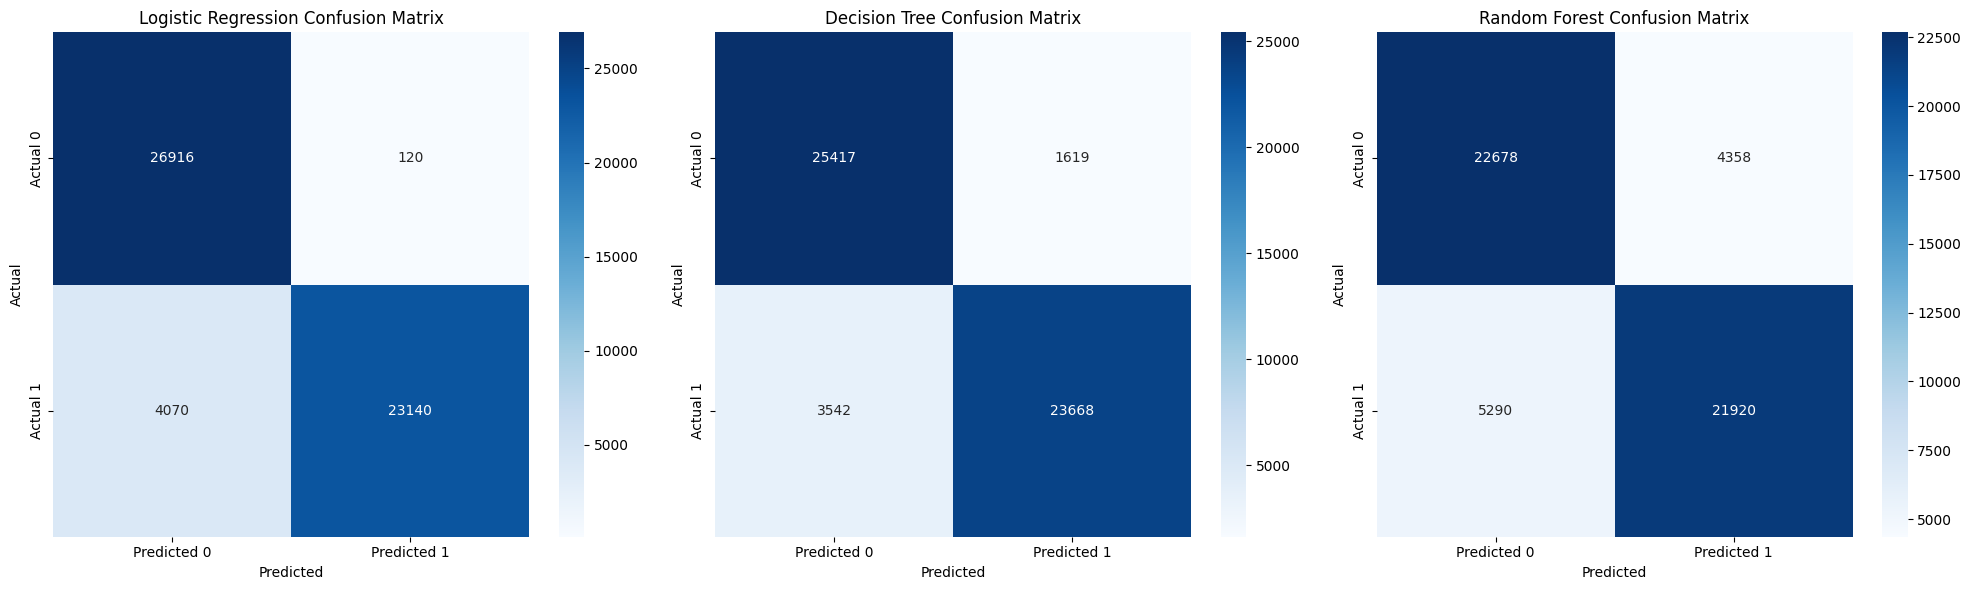

In [ ]:
# Generate confusion matrices
conf_matrix_lr = confusion_matrix(y_test, y_pred)
conf_matrix_dtree = confusion_matrix(y_test, dtree_pred )
conf_matrix_rf = confusion_matrix(y_test, rf_prd)

# Convert confusion matrices to DataFrames for better visualization
conf_matrix_lr_df = pd.DataFrame(conf_matrix_lr, index=[f'Actual {i}' for i in range(len(conf_matrix_lr))], columns=[f'Predicted {i}' for i in range(len(conf_matrix_lr[0]))])
conf_matrix_dtree_df = pd.DataFrame(conf_matrix_dtree, index=[f'Actual {i}' for i in range(len(conf_matrix_dtree))], columns=[f'Predicted {i}' for i in range(len(conf_matrix_dtree[0]))])
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, index=[f'Actual {i}' for i in range(len(conf_matrix_rf))], columns=[f'Predicted {i}' for i in range(len(conf_matrix_rf[0]))])

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(conf_matrix_lr_df, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

sns.heatmap(conf_matrix_dtree_df, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

sns.heatmap(conf_matrix_rf_df, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Random Forest Confusion Matrix')
axes[2].set_ylabel('Actual')
axes[2].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

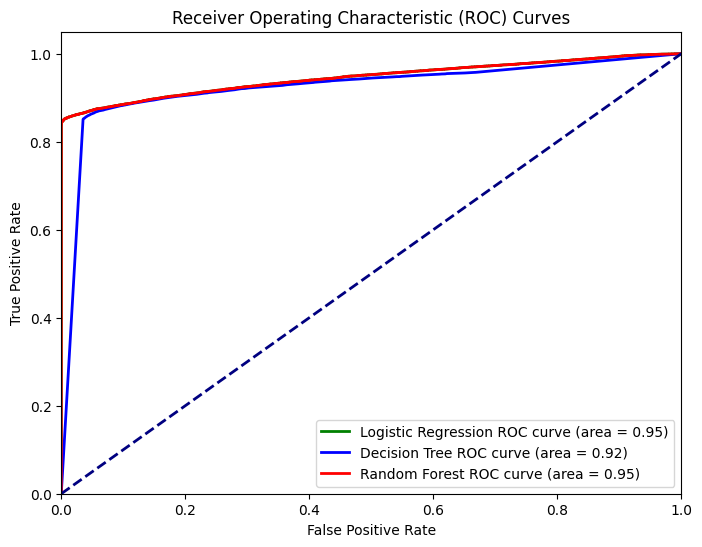

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve and AUC for Decision Tree
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_pred_prob_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dtree, tpr_dtree, color='blue', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dtree)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define lists to store metric values
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Calculate metrics for each model
for model, pred in zip(models, [y_pred, dtree_pred, rf_prd]):
    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

# Create a DataFrame to display metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Print the DataFrame
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.922759   0.994841  0.850423  0.916980
1        Decision Tree  0.904859   0.935975  0.869827  0.901690
2        Random Forest  0.822144   0.834158  0.805586  0.819623


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:


!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab\ Notebooks/Final_Project_HCDA.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Final_Project_HCDA.ipynb to pdf
[NbConvertApp] Support files will be in Final_Project_HCDA_files/
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[NbConvertApp] Making directory ./Final_Project_HCDA_files
[N